In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('data/bank-additional.csv',sep=';')

In [24]:
df = df.drop('duration',axis=1)

In [25]:
df.shape

(4119, 20)

In [26]:
df.head(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no


In [27]:
col_names = df.columns

In [28]:
col_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [29]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [30]:
df['y'].value_counts() / np.float(len(df))

no     0.890507
yes    0.109493
Name: y, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [32]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [33]:
len(df.columns)

20

In [34]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [35]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

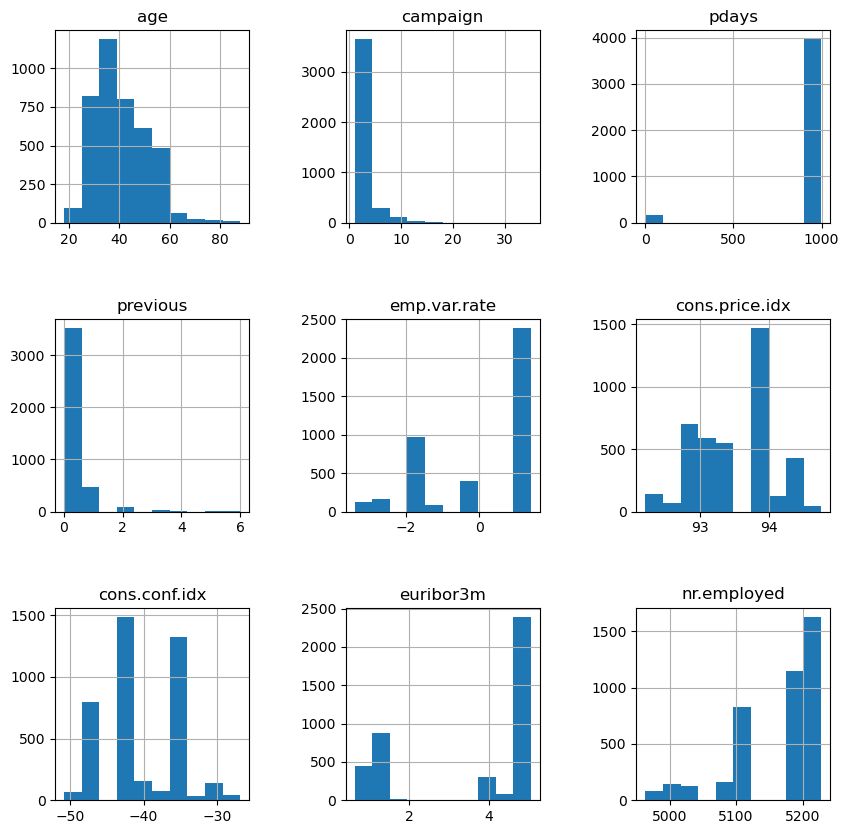

In [36]:
df.hist(column=numeric_cols,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5,hspace = 0.5);

In [37]:
df['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [38]:
df['poutcome'] = df['poutcome'].map({'failure':-1,'nonexistent':0,'success':1})

In [39]:
df['poutcome'].value_counts()

 0    3523
-1     454
 1     142
Name: poutcome, dtype: int64

In [40]:
df['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [41]:
df['default'] = df['default'].map({'yes':-1,'unknown':0,'no':1})

In [42]:
df['default'].value_counts()

 1    3315
 0     803
-1       1
Name: default, dtype: int64

In [43]:
df['housing'] = df['housing'].map({'yes': -1, 'unknown': 0, 'no': 1})
df['loan'] = df['loan'].map({'yes':-1, 'unknown': 0, 'no': 1})

In [44]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [45]:
nominal = ['job','marital','education','contact','month','day_of_week']

In [46]:
df.shape

(4119, 20)

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [48]:
df = pd.get_dummies(df,columns=nominal)

In [49]:
df.shape

(4119, 55)

In [50]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of

In [51]:
df['y'] = df['y'].map({'yes':1,'no':0})
df.head(6)

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,-1,1,2,999,0,0,-1.8,92.893,...,0,1,0,0,0,1,0,0,0,0
1,39,1,1,1,4,999,0,0,1.1,93.994,...,0,1,0,0,0,1,0,0,0,0
2,25,1,-1,1,1,999,0,0,1.4,94.465,...,0,0,0,0,0,0,0,0,0,1
3,38,1,0,0,3,999,0,0,1.4,94.465,...,0,0,0,0,0,1,0,0,0,0
4,47,1,-1,1,1,999,0,0,-0.1,93.200,...,0,0,1,0,0,0,1,0,0,0
5,32,1,1,1,3,999,2,-1,-1.1,94.199,...,0,0,0,0,1,0,0,1,0,0


In [52]:
X = df.drop(['y'],axis=1)
y = df['y']

In [53]:
X.shape

(4119, 54)

In [54]:
y.shape

(4119,)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [56]:
X_train.shape

(3295, 54)

In [57]:
X_test.shape

(824, 54)

In [58]:
cols = X_train.columns

In [59]:
cols

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week

In [60]:
X_train[numeric_cols]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3199,30,2,999,0,1.1,93.994,-36.4,4.856,5191.0
3258,42,2,999,0,1.4,93.444,-36.1,4.968,5228.1
3153,48,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
399,30,2,999,1,-0.1,93.200,-42.0,4.021,5195.8
1410,28,1,999,0,-1.8,92.893,-46.2,1.291,5099.1
...,...,...,...,...,...,...,...,...,...
1033,50,17,999,0,1.4,94.465,-41.8,4.961,5228.1
3264,45,3,999,0,1.4,93.918,-42.7,4.961,5228.1
1653,27,2,999,0,-2.9,92.201,-31.4,0.879,5076.2
2607,56,3,999,0,1.4,93.918,-42.7,4.962,5228.1


In [67]:
#Scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [68]:
type(X_train)

numpy.ndarray

In [69]:
X_train = pd.DataFrame (X_train, columns=[cols])
X_test = pd.DataFrame (X_test, columns=[cols])

In [70]:
X_train[cols]

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.977249,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.656694,0.724940,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
1,0.179962,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.848657,-0.225414,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
2,0.758567,0.491928,-0.917247,0.464636,-0.587892,0.204284,-0.356918,0.200672,-0.111158,-0.647026,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3,-0.977249,0.491928,1.118677,0.464636,-0.195607,0.204284,1.495123,-2.444187,-0.111158,-0.647026,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,2.104361,-0.514189,-0.510412,-0.512301,-0.487638
4,-1.170117,0.491928,1.118677,0.464636,-0.587892,0.204284,-0.356918,0.200672,-1.198948,-1.177496,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0.951435,-2.025002,1.118677,0.464636,5.688668,0.204284,-0.356918,0.200672,0.848657,1.538789,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3291,0.469264,-2.025002,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
3292,-1.266551,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,-1.902812,-2.373214,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,-0.512301,2.050700
3293,1.530041,0.491928,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638


#decision Tree Classifier GINI INDEX

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [76]:
y_pred_gini = clf_gini.predict(X_test)

In [78]:
from sklearn.metrics import roc_auc_score

In [79]:
y_pred_gini_score = roc_auc_score(y_test,y_pred_gini)

In [81]:
print(f"Model's ROC-AUC score by Gini Index: {y_pred_gini_score}")

Model's ROC-AUC score by Gini Index: 0.5795102730087249


In [ ]:
#train set and test set compairing

In [82]:
y_pred_train_gini = clf_gini.predict(X_train)

In [83]:
y_pred_train_gini_score = roc_auc_score(y_train,y_pred_train_gini)

In [84]:
print(f"Model's ROC-AUC score by Gini Index: {y_pred_train_gini_score}")

Model's ROC-AUC score by Gini Index: 0.608538812785388


In [85]:
print(f'Train Set Score: {y_pred_train_gini_score}')
print(f'Test Set Score: {y_pred_gini_score}')

Train Set Score: 0.608538812785388
Test Set Score: 0.5795102730087249


#decision tree visualization

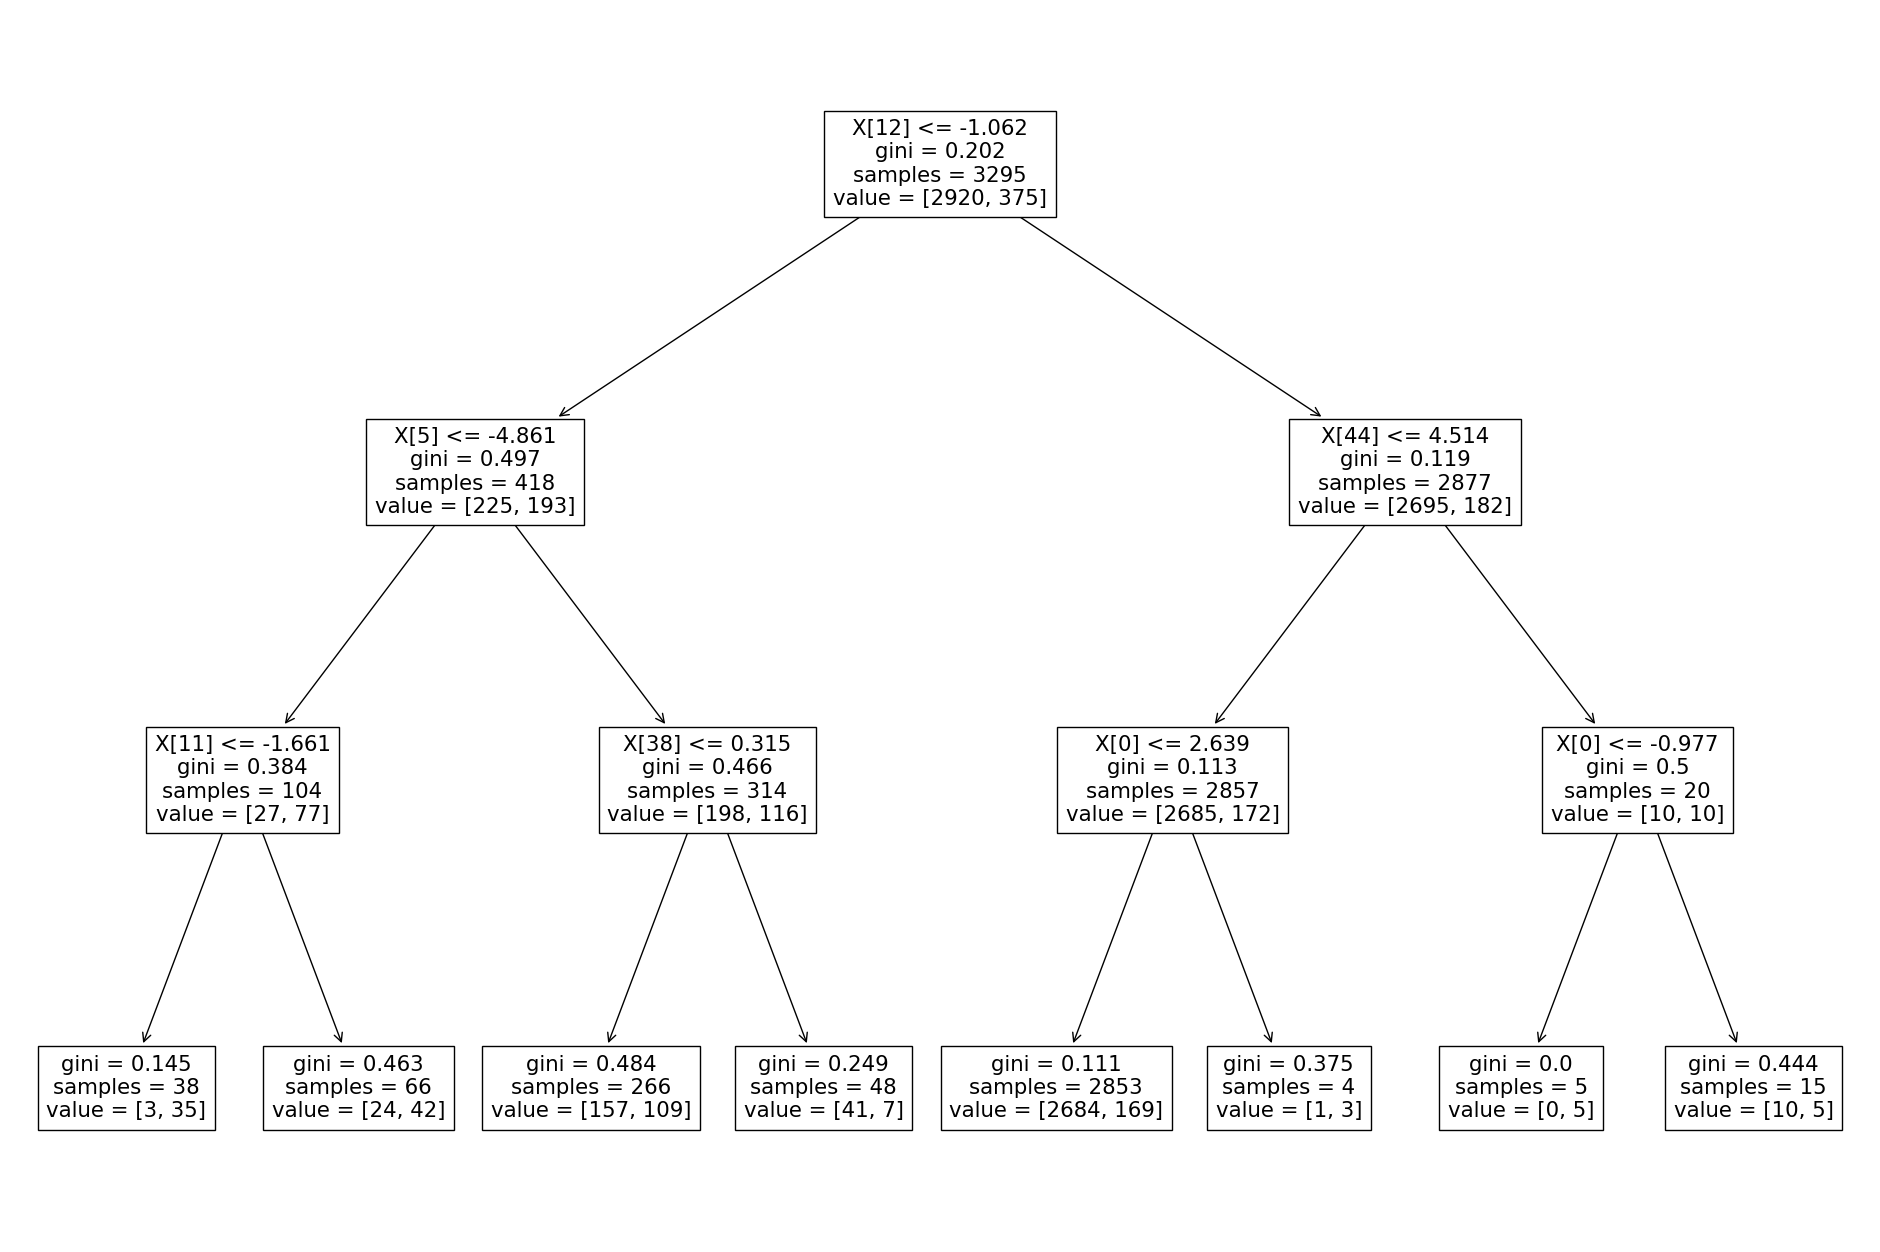

In [90]:
plt.figure(figsize=(24,16))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train,y_train));

In [92]:
X.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week

In [93]:
X.columns[12]

'nr.employed'

#decision tree classifier (entropy)

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
clf_ent = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

clf_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [98]:
y_pred_ent = clf_ent.predict(X_test)

In [99]:
y_pred_ent_score = roc_auc_score(y_test,y_pred_ent)

In [100]:
print(f"Model's ROC-AUC score by Entropy: {y_pred_ent_score}")

Model's ROC-AUC score by Entropy: 0.5670208274697439


#train set and test set compairing

In [102]:
y_pred_train_ent = clf_ent.predict(X_train)

In [103]:
y_pred_train_ent_score = roc_auc_score(y_train,y_pred_train_ent)

In [104]:
print(f"Model's ROC-AUC score by Entropy: {y_pred_train_ent_score}")

Model's ROC-AUC score by Entropy: 0.5980433789954338


In [105]:
print(f'Train Set Score: {y_pred_train_ent_score}')
print(f'Test Set Score: {y_pred_ent_score}')

Train Set Score: 0.5980433789954338
Test Set Score: 0.5670208274697439


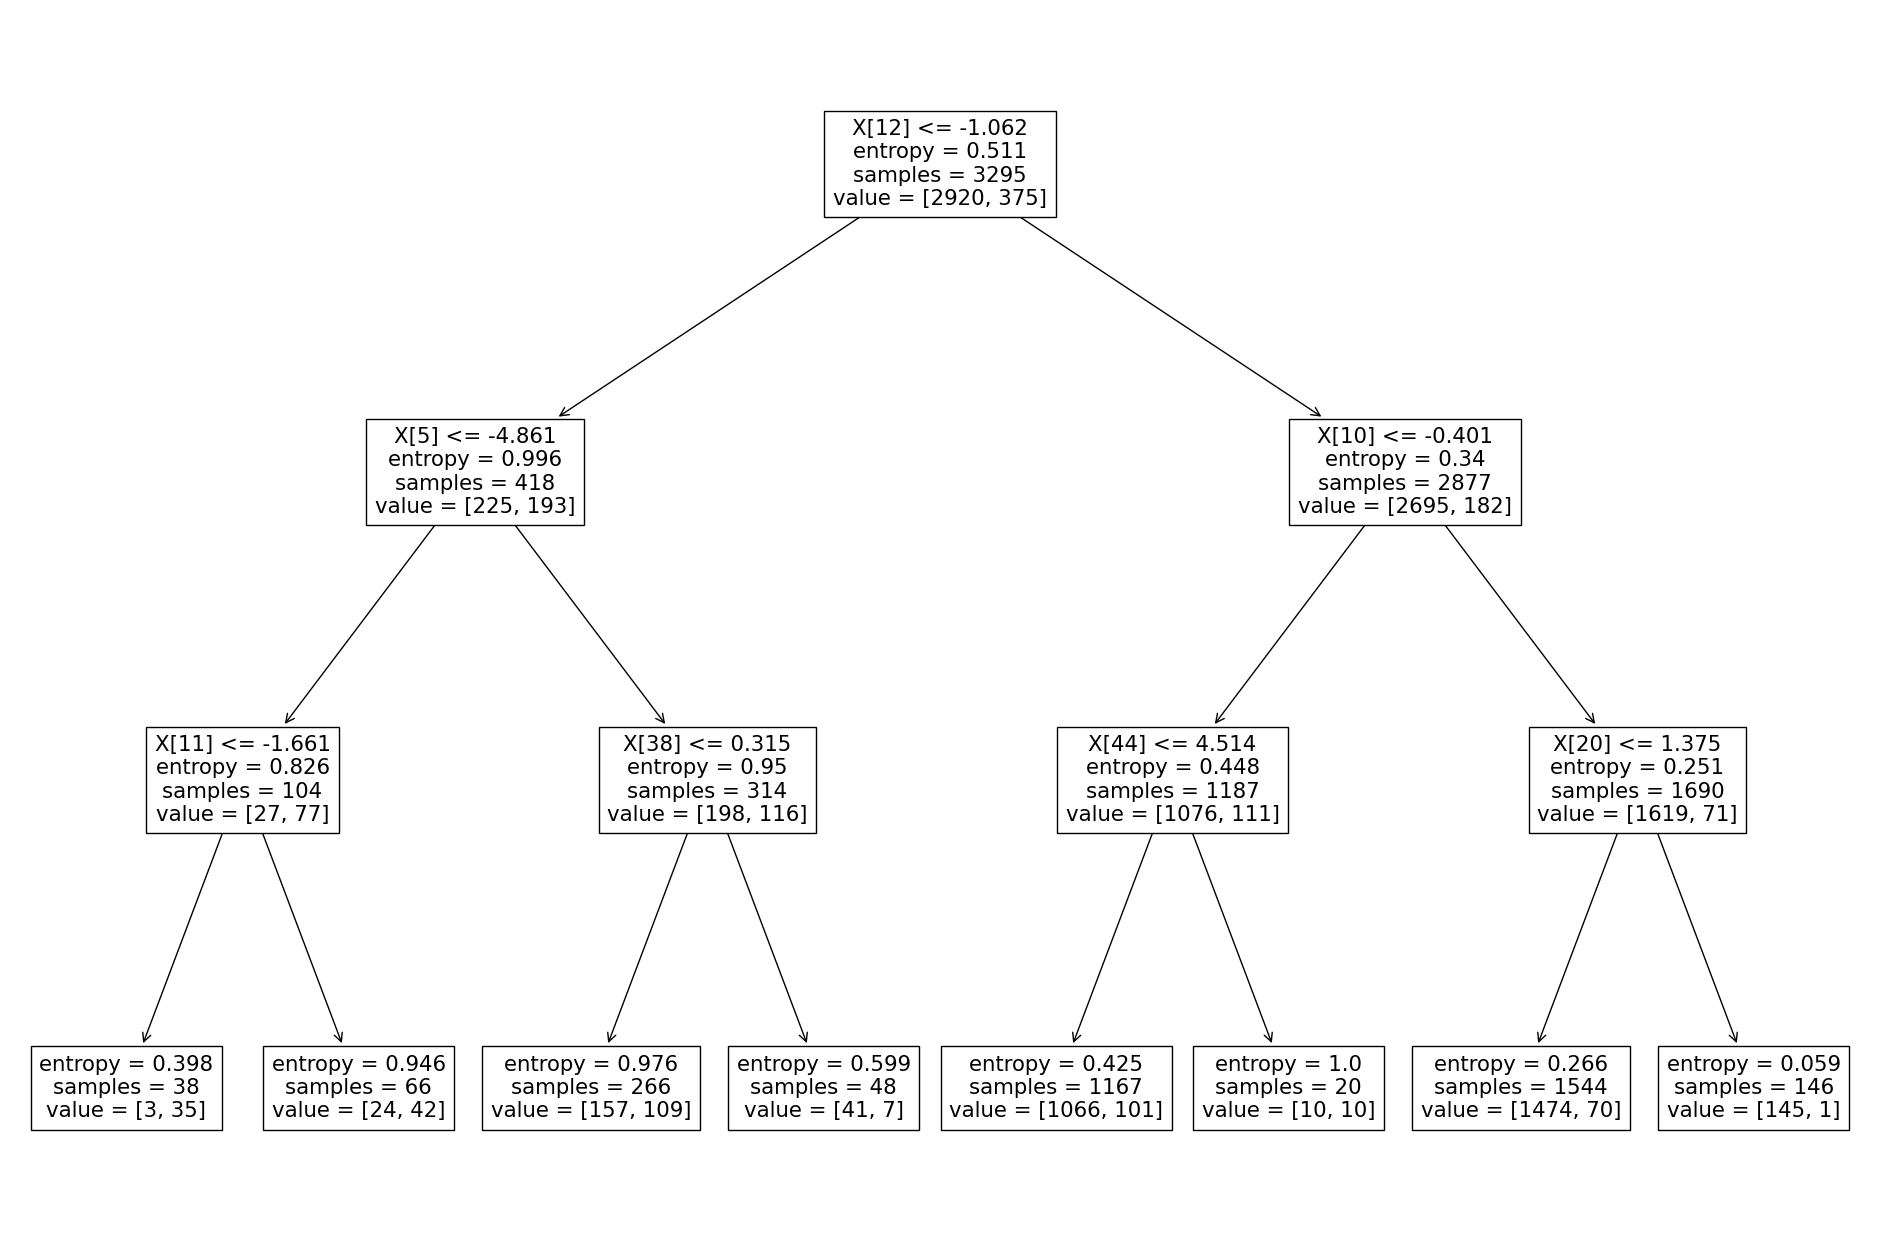

In [108]:
plt.figure(figsize=(24,16))

from sklearn import tree

tree.plot_tree(clf_ent.fit(X_train,y_train));